This Colab notebook visualizes the evolution of 3D probability distributions within complex diffusion models, providing an intuitive way to understand and analyze how they work.

*   Tutorial by ADIAS Lab.
*   Author: Jaeik Kim.



In [1]:
!pip install pyvista ipyvtklink pythreejs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 75.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.8/125.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 271.7/271.7 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 47.5 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


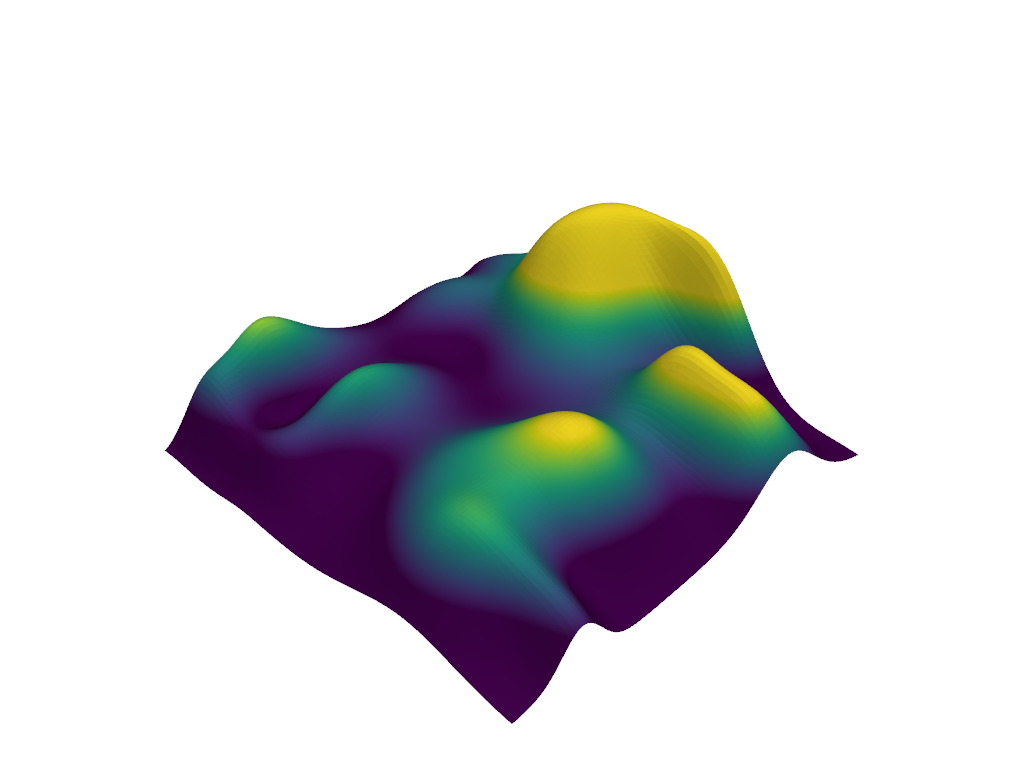

In [4]:
from pyvista import examples
import pyvista as pv

mesh = examples.load_random_hills()

p = pv.Plotter(notebook=True)
p.add_mesh(mesh, cmap="viridis", clim=[2, 5], show_scalar_bar=False)
p.show()

/usr/local/lib/python3.11/dist-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


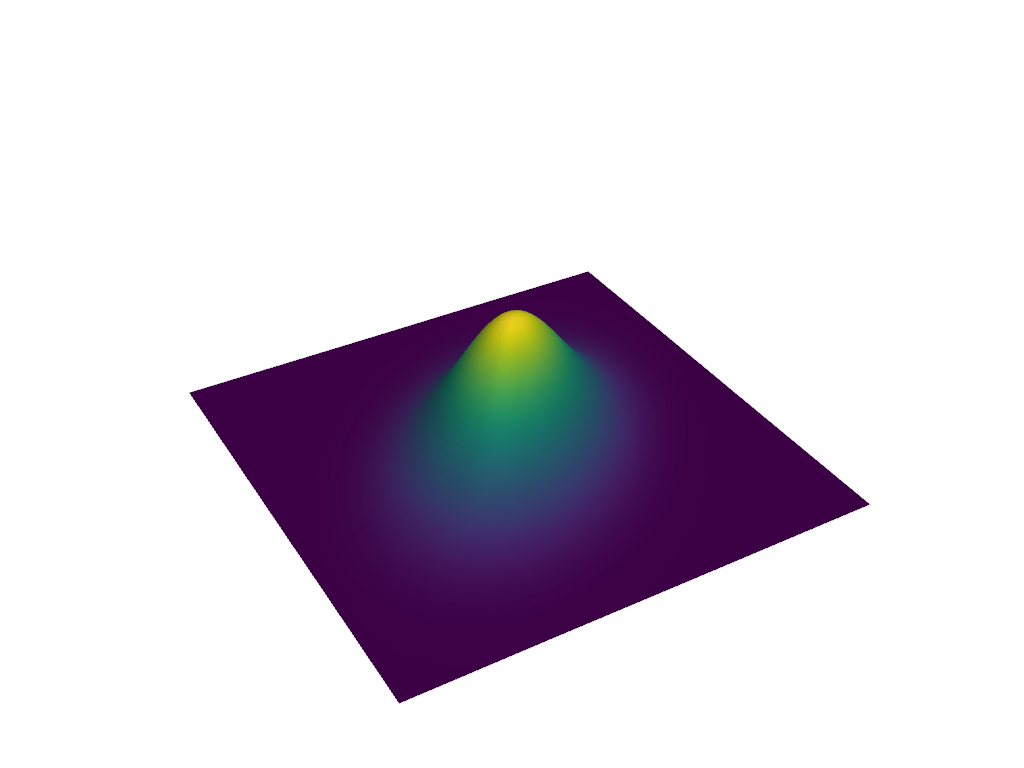

In [32]:
import pyvista as pv
import numpy as np
from scipy.stats import multivariate_normal

x_coords = np.linspace(-5, 5, 100)
y_coords = np.linspace(-5, 5, 100)
xx, yy = np.meshgrid(x_coords, y_coords)

mean = [0.0, 0.0]
cov = [[2, 0.8], [0.8, 2]]

pos = np.dstack((xx, yy))
pdf_values = multivariate_normal(mean, cov).pdf(pos)

grid = pv.ImageData()

grid.dimensions = (100, 100, 1)

grid.spacing = (x_coords[1] - x_coords[0], y_coords[1] - y_coords[0], 1.0)
grid.origin = (x_coords[0], y_coords[0], 0.0)

grid.point_data["elevation"] = pdf_values.flatten(order="F")

warped_surface = grid.warp_by_scalar("elevation", factor=35)


# --- 4. 플로팅 ---
p = pv.Plotter(notebook=True)

p.add_mesh(warped_surface, cmap='viridis',show_scalar_bar=False)

# 카메라 위치 설정
p.camera.azimuth = 15
p.camera.elevation = 0
p.camera.zoom(1.0)

p.show()

/usr/local/lib/python3.11/dist-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


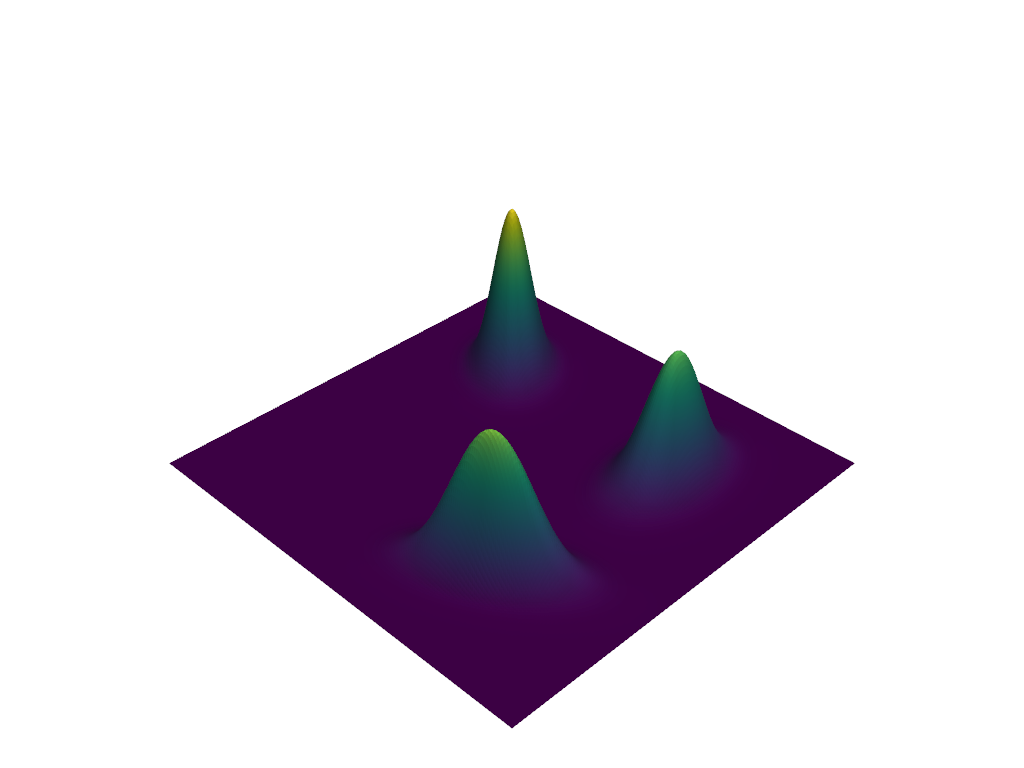

In [39]:
import pyvista as pv
import numpy as np
from scipy.stats import multivariate_normal


x_coords = np.linspace(-10, 10, 200)
y_coords = np.linspace(-10, 10, 200)
xx, yy = np.meshgrid(x_coords, y_coords)
pos = np.dstack((xx, yy))

hill1_mean = [-5, -5]
hill1_cov = [[1, 0.3], [0.3, 1]]
pdf1 = multivariate_normal(hill1_mean, hill1_cov).pdf(pos)

hill2_mean = [4, 5]
hill2_cov = [[2, -0.8], [-0.8, 1]]
pdf2 = multivariate_normal(hill2_mean, hill2_cov).pdf(pos)

hill3_mean = [5, -4]
hill3_cov = [[0.8, 0], [0, 2]]
pdf3 = multivariate_normal(hill3_mean, hill3_cov).pdf(pos)

final_pdf_values = pdf1 + pdf2 + pdf3

normalized_values = (final_pdf_values - final_pdf_values.min()) / (final_pdf_values.max() - final_pdf_values.min())


grid = pv.ImageData()
grid.dimensions = (200, 200, 1)
grid.spacing = (x_coords[1] - x_coords[0], y_coords[1] - y_coords[0], 1.0)
grid.origin = (x_coords[0], y_coords[0], 0.0)

grid.point_data["elevation"] = normalized_values.flatten(order="F")

warped_surface = grid.warp_by_scalar("elevation", factor=8)

p.camera.azimuth = 15
p.camera.elevation = 0
p.camera.zoom(1.0)

p = pv.Plotter(notebook=True)
p.add_mesh(warped_surface, cmap='viridis',show_scalar_bar=False)
p.show()

Add noise to landscape

In [40]:
!pip install noise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for noise: filename=noise-1.2.2-cp311-cp311-linux_x86_64.whl size=56281 sha256=caa3cb8bb3cdc63db41b7912e7a8dac5747ef2eb2246279d24a97af5babb0bd8
  Stored in directory: /root/.cache/pip/wheels/39/25/2e/af6d1bcc91a8f99af0f651f8718b9ab999720a21c6d4149091
Successfully built noise


/usr/local/lib/python3.11/dist-packages/pyvista/jupyter/notebook.py:36: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


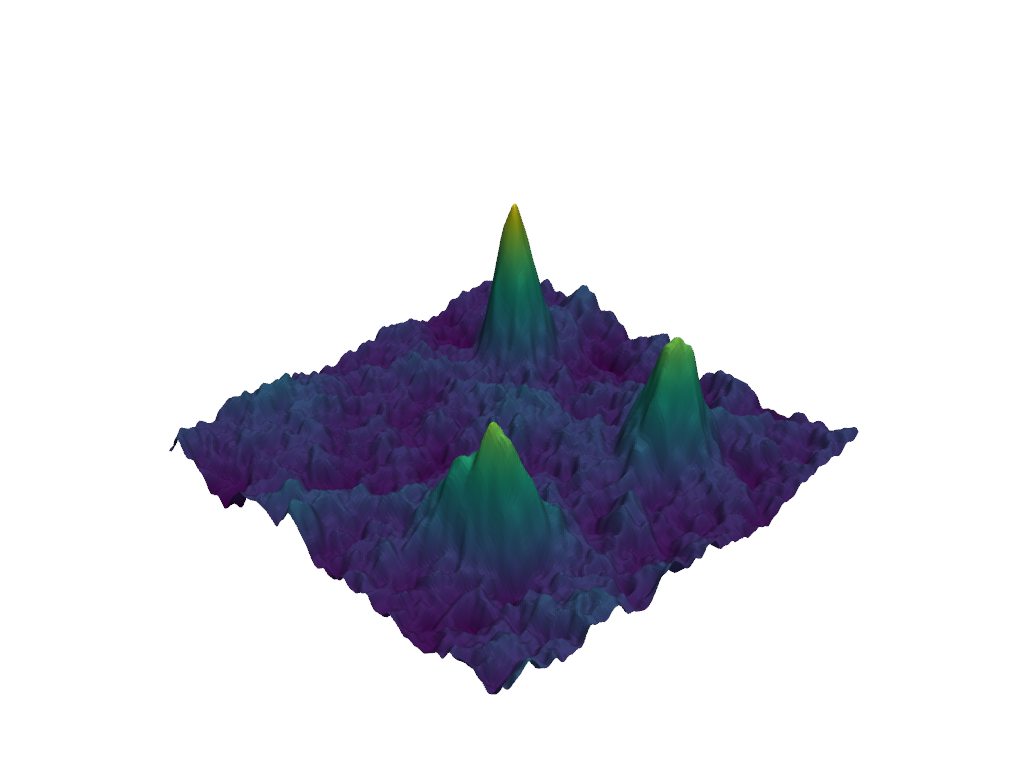

In [45]:
import pyvista as pv
import numpy as np
from scipy.stats import multivariate_normal
import noise

x_coords = np.linspace(-10, 10, 200)
y_coords = np.linspace(-10, 10, 200)
xx, yy = np.meshgrid(x_coords, y_coords)
pos = np.dstack((xx, yy))


hill1_mean = [-5, -5]
hill1_cov = [[1, 0.3], [0.3, 1]]
pdf1 = multivariate_normal(hill1_mean, hill1_cov).pdf(pos)

hill2_mean = [4, 5]
hill2_cov = [[2, -0.8], [-0.8, 1]]
pdf2 = multivariate_normal(hill2_mean, hill2_cov).pdf(pos)

hill3_mean = [5, -4]
hill3_cov = [[0.8, 0], [0, 2]]
pdf3 = multivariate_normal(hill3_mean, hill3_cov).pdf(pos)

three_hills_layer = pdf1 + pdf2 + pdf3

three_hills_layer = (three_hills_layer - three_hills_layer.min()) / (three_hills_layer.max() - three_hills_layer.min())

noise_layer = np.zeros(xx.shape)
scale = 35.0
octaves = 4
persistence = 0.6
lacunarity = 2.0

for i in range(200):
    for j in range(200):
        noise_layer[i][j] = noise.pnoise2(i / scale,
                                          j / scale,
                                          octaves=octaves,
                                          persistence=persistence,
                                          lacunarity=lacunarity,
                                          repeatx=1024,
                                          repeaty=1024,
                                          base=42)

noise_layer = (noise_layer - noise_layer.min()) / (noise_layer.max() - noise_layer.min())


hill_weight = 0.7
noise_weight = 0.3

final_elevation = hill_weight * three_hills_layer + noise_weight * noise_layer

grid = pv.ImageData()
grid.dimensions = (200, 200, 1)
grid.spacing = (x_coords[1] - x_coords[0], y_coords[1] - y_coords[0], 1.0)
grid.origin = (x_coords[0], y_coords[0], 0.0)
grid.point_data["elevation"] = final_elevation.flatten(order="F")

warped_surface = grid.warp_by_scalar("elevation", factor=10)

p = pv.Plotter(notebook=True)
p.add_mesh(warped_surface, cmap='viridis',show_scalar_bar=False)
p.show()